In [128]:
#读取csv
import pandas as pd
data = pd.read_csv('data1.csv',index_col=0,header=0)
#data = pd.read_csv('data1.csv')

In [129]:
data.shape

(10000, 31)

In [130]:
data.columns

Index(['y', 'age', 'xaccount_age', 'cred_limit', 'this_bill_rate',
       'this_bill_mp', 'last_mp_days', 'six_bill_num', 'six_bill_avg_amt',
       'six_cycle_mp_num', 'six_cycle_mp_avg_amt', 'six_bill_avg_debt_rate',
       'six_bill_low_repay_num', 'epp_nbr_12m', 'alop_nbr_12m',
       'epp_avg_amt_12m', 'alop_avg_amt_12m', 'consume_num_session12',
       'consume_num_session6', 'consume_num_session3', 'consume_num_session',
       'consume_amt_session12', 'consume_amt_session6', 'consume_amt_session3',
       'consume_amt_session', 'month_avg_use_year', 'month_avg_use_month6',
       'month_avg_use_month3', 'mar_status_0.0', 'mar_status_1.0',
       'mar_status_2.0'],
      dtype='object')

In [131]:
y=data['y'] # 提取出survived 列
#X=data.drop(['id','y','six_optial_mp_num','six_optial_mp_avg_amt'],axis=1) # 提取除去这三列的其它所有列
X=data.drop(['y'],axis=1) # 提取除去这三列的其它所有列

#特征选择
参考文档：
自然语言处理学习笔记7：特征选择方法
https://blog.csdn.net/weixin_41931602/article/details/80551801

In [132]:
#移除低方差的特征 (Removing features with low variance)  -例子
'''from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
'''

'from sklearn.feature_selection import VarianceThreshold\nX = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]\nsel = VarianceThreshold(threshold=(.8 * (1 - .8)))\nsel.fit_transform(X)\n'

In [133]:
from sklearn.feature_selection import VarianceThreshold
#X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.9 * (1 - .9))) 
new_X = sel.fit_transform(X,y)

# 找出需要删除的变量名
to_drop = []
for i in range(len(sel.get_support())):
    if sel.get_support()[i] == False:
        to_drop.append(X.keys()[i])


In [134]:
to_drop

['mar_status_1.0']

In [135]:
new_X.shape

(10000, 29)

In [136]:
# 皮尔森系数
data.corr()  # pearson相关系数

,y,age,xaccount_age,cred_limit,this_bill_rate,this_bill_mp,last_mp_days,six_bill_num,six_bill_avg_amt,six_cycle_mp_num,...,consume_amt_session12,consume_amt_session6,consume_amt_session3,consume_amt_session,month_avg_use_year,month_avg_use_month6,month_avg_use_month3,mar_status_0.0,mar_status_1.0,mar_status_2.0
y,1.000000,-0.023006,-0.033931,0.047584,0.045032,0.049607,-0.307687,-0.036732,0.029215,0.432017,...,0.012006,0.020136,0.025196,0.060037,-0.028269,-0.024747,-0.029530,-0.035696,-0.006213,0.038762
age,-0.023006,1.000000,0.266404,0.197152,-0.037503,0.116009,-0.053504,0.087332,0.170185,0.004067,...,0.135337,0.122420,0.113425,0.099837,-0.030815,-0.024947,-0.031464,0.463746,0.057691,-0.495154
xaccount_age,-0.033931,0.266404,1.000000,0.386580,-0.163417,0.209242,-0.260374,0.362141,0.289868,0.040283,...,0.266491,0.213854,0.179275,0.142369,-0.127432,-0.111025,-0.150746,-0.004501,-0.014769,0.010008
cred_limit,0.047584,0.197152,0.386580,1.000000,-0.165651,0.563635,-0.204966,0.147350,0.613264,0.104383,...,0.588934,0.568514,0.548182,0.511158,-0.118740,-0.104489,-0.145711,0.090592,-0.016989,-0.086382
this_bill_rate,0.045032,-0.037503,-0.163417,-0.165651,1.000000,0.189804,0.142290,-0.131301,0.034180,-0.095176,...,0.136978,0.183651,0.232943,0.341798,0.420582,0.406729,0.635937,0.025064,0.004229,-0.027169
this_bill_mp,0.049607,0.116009,0.209242,0.563635,0.189804,1.000000,-0.067051,0.090149,0.771398,-0.078456,...,0.720084,0.753631,0.789703,0.845768,0.050969,0.061704,0.125495,0.083064,0.004158,-0.086428
last_mp_days,-0.307687,-0.053504,-0.260374,-0.204966,0.142290,-0.067051,1.000000,-0.283887,-0.163129,-0.560795,...,-0.147161,-0.110676,-0.078133,-0.037461,0.117325,0.111816,0.167412,0.024029,0.017221,-0.030866
six_bill_num,-0.036732,0.087332,0.362141,0.147350,-0.131301,0.090149,-0.283887,1.000000,0.097109,0.139933,...,0.206839,0.180070,0.123521,0.047980,-0.106625,-0.096269,-0.133108,0.010379,-0.021679,-0.002673
six_bill_avg_amt,0.029215,0.170185,0.289868,0.613264,0.034180,0.771398,-0.163129,0.097109,1.000000,0.013688,...,0.706348,0.722173,0.691110,0.630243,0.021233,0.031882,0.049448,0.092870,-0.003253,-0.093739
six_cycle_mp_num,0.432017,0.004067,0.040283,0.104383,-0.095176,-0.078456,-0.560795,0.139933,0.013688,1.000000,...,0.014876,0.004031,-0.024714,-0.049248,-0.075156,-0.075364,-0.128895,-0.027392,-0.002777,0.029016


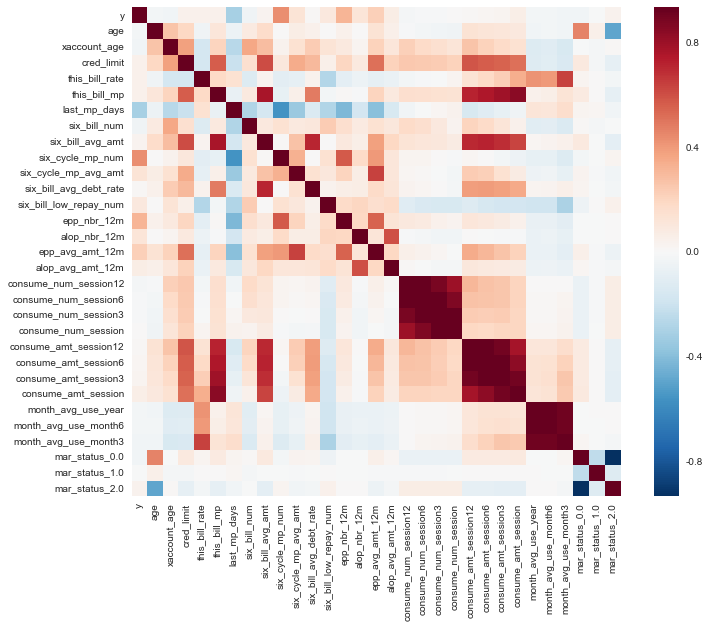

In [137]:

# 载入seaborn作图
import seaborn as sns
import re  # Regular Expression operations
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#计算所有特征值每两个之间的相关系数，并作图表示。
corrmat = data.corr()#得到相关系数
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)#热点图


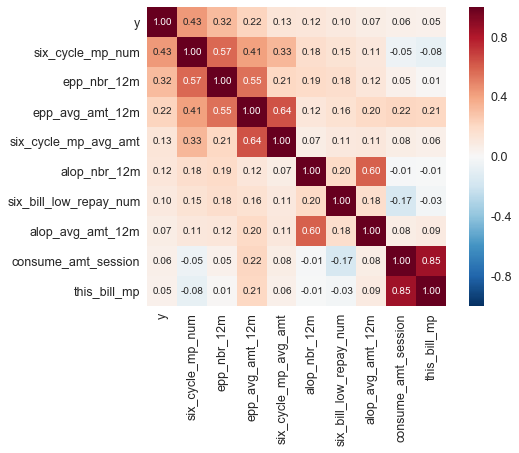

In [139]:
#取出相关性最大的前十个，做出热点图表示
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',     annot_kws={'size': 10}, yticklabels=cols.values,    xticklabels=cols.values)
plt.show()

In [146]:
#所以 cols筛选出来 
cols

Index(['y', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt', 'epp_nbr_12m',
       'epp_avg_amt_12m', 'alop_nbr_12m', 'alop_avg_amt_12m',
       'six_bill_low_repay_num', 'consume_amt_session', 'consume_num_session'],
      dtype='object')

In [147]:
#选出来9个
data[cols]

,y,six_cycle_mp_num,six_cycle_mp_avg_amt,epp_nbr_12m,epp_avg_amt_12m,alop_nbr_12m,alop_avg_amt_12m,six_bill_low_repay_num,consume_amt_session,consume_num_session
0,0.0,1.0,8590.600000,2.0,2299.06,0.0,0.00,1.0,1249.00,2.0
1,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,3.0,0.00,0.0
2,0.0,0.0,0.000000,1.0,1168.51,0.0,0.00,0.0,22600.20,15.0
3,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,5000.00,5.0
4,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,59418.00,40.0
5,0.0,2.0,10502.000000,14.0,8273.81,0.0,0.00,0.0,28091.00,4.0
6,0.0,0.0,0.000000,0.0,0.00,1.0,5000.00,0.0,45121.00,6.0
7,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,1223.70,4.0
8,0.0,0.0,0.000000,1.0,1668.67,0.0,0.00,2.0,53565.00,4.0
9,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,19331.85,40.0


In [149]:
data[cls].to_csv('data2.csv') #将特征取出来的整理好的数据集合放到data2

In [140]:
# 皮尔森系数
#data.corr()  # pearson相关系数
data.corr('kendall') # Kendall Tau相关系数
#data.corr('spearman') # spearman秩相关

,y,age,xaccount_age,cred_limit,this_bill_rate,this_bill_mp,last_mp_days,six_bill_num,six_bill_avg_amt,six_cycle_mp_num,...,consume_amt_session12,consume_amt_session6,consume_amt_session3,consume_amt_session,month_avg_use_year,month_avg_use_month6,month_avg_use_month3,mar_status_0.0,mar_status_1.0,mar_status_2.0
y,1.000000,-0.027952,-0.030184,0.050395,0.076472,0.063006,-0.327785,-0.016722,0.030578,0.394467,...,0.032093,0.037823,0.048026,0.101247,-0.019777,-0.012076,-0.000937,-0.035696,-0.006213,0.038762
age,-0.027952,1.000000,0.151897,0.161510,-0.030028,0.077515,-0.027763,0.080467,0.138551,-0.014361,...,0.119401,0.105642,0.093778,0.070587,-0.042723,-0.038270,-0.030394,0.421549,0.054903,-0.451000
xaccount_age,-0.030184,0.151897,1.000000,0.204789,-0.141561,0.075606,-0.195248,0.585909,0.163012,0.052691,...,0.256762,0.144558,0.070773,0.000708,-0.191199,-0.179454,-0.155920,-0.003811,-0.035950,0.017057
cred_limit,0.050395,0.161510,0.204789,1.000000,-0.146319,0.384354,-0.137062,0.138156,0.508772,0.083936,...,0.450861,0.438975,0.408491,0.339413,-0.182438,-0.161034,-0.143406,0.107329,-0.012257,-0.105223
this_bill_rate,0.076472,-0.030028,-0.141561,-0.146319,1.000000,0.298564,0.097899,-0.113380,0.088650,-0.072704,...,0.183776,0.249049,0.318973,0.461785,0.550143,0.583303,0.637219,0.029969,0.006160,-0.032889
this_bill_mp,0.063006,0.077515,0.075606,0.384354,0.298564,1.000000,0.048676,0.055658,0.576056,-0.121550,...,0.444413,0.486506,0.544220,0.680250,0.189521,0.212259,0.247078,0.081935,-0.001345,-0.083260
last_mp_days,-0.327785,-0.027763,-0.195248,-0.137062,0.097899,0.048676,1.000000,-0.223306,-0.092148,-0.724826,...,-0.132427,-0.081742,-0.030135,0.036378,0.138515,0.142010,0.148101,0.024555,0.010145,-0.028814
six_bill_num,-0.016722,0.080467,0.585909,0.138156,-0.113380,0.055658,-0.223306,1.000000,0.094976,0.113699,...,0.320064,0.205491,0.088842,-0.010982,-0.153469,-0.156155,-0.136234,0.008156,-0.025047,0.000832
six_bill_avg_amt,0.030578,0.138551,0.163012,0.508772,0.088650,0.576056,-0.092148,0.094976,1.000000,0.019911,...,0.515088,0.549883,0.522448,0.416281,0.111907,0.131475,0.124159,0.113633,-0.003710,-0.114795
six_cycle_mp_num,0.394467,-0.014361,0.052691,0.083936,-0.072704,-0.121550,-0.724826,0.113699,0.019911,1.000000,...,0.072523,0.060503,0.008352,-0.049205,-0.102077,-0.104165,-0.132637,-0.030420,0.005078,0.029235


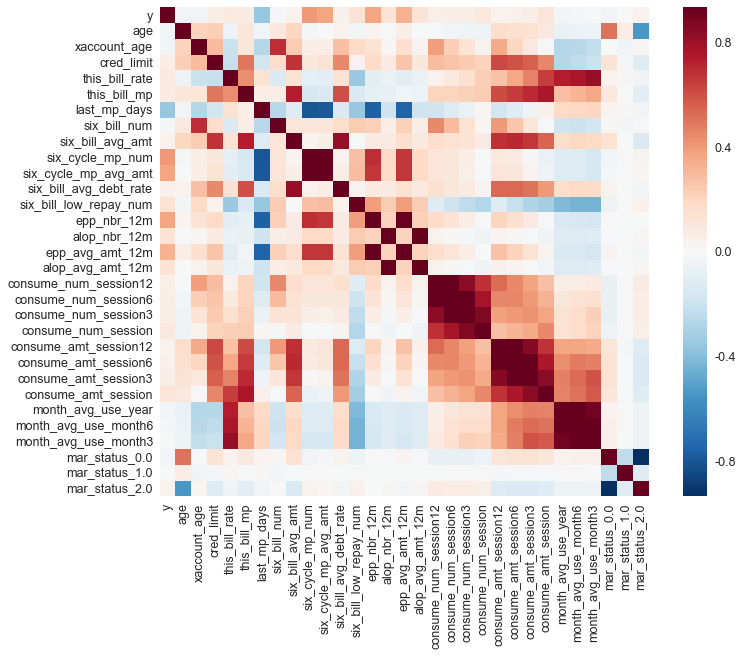

In [144]:
import seaborn as sns
import re  # Regular Expression operations
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#计算所有特征值每两个之间的相关系数，并作图表示。
corrmat = data.corr('kendall') # Kendall Tau相关系数
#data.corr('kendall') # Kendall Tau相关系数
corrmat =data.corr('spearman') # spearman秩相关
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)#热点图

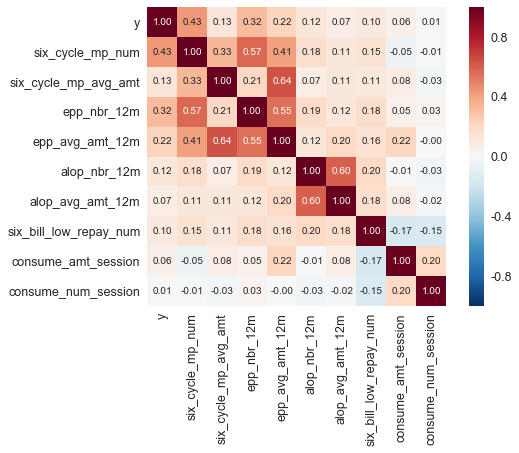

In [142]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',     annot_kws={'size': 10}, yticklabels=cols.values,    xticklabels=cols.values)
plt.show()

In [145]:
cols

Index(['y', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt', 'epp_nbr_12m',
       'epp_avg_amt_12m', 'alop_nbr_12m', 'alop_avg_amt_12m',
       'six_bill_low_repay_num', 'consume_amt_session', 'consume_num_session'],
      dtype='object')

In [26]:
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.linear_model import LinearRegression

# Load boston housing dataset as an example
#boston = load_boston()
#X = boston["data"]
#Y = boston["target"]
#names = boston["feature_names"]

y=data['y'] # 提取出survived 列
#X=data.drop(['id','y','six_optial_mp_num','six_optial_mp_avg_amt'],axis=1) # 提取除去这三列的其它所有列
X=data.drop(['y'],axis=1) # 提取除去这三列的其它所有列
X=data.drop(['city'],axis=1) # city也没用
names=X.columns

#这里要注意的是，上面的scores都是负数，为什么均方误差会出现负数的情况呢？
#因为这里的mean_squared_error是一种损失函数，优化的目标的使其最小化，而分类准确率是一种奖励函数，优化的目标是使其最大化。
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)


#rf = RandomForestRegressor(n_estimators=20, max_depth=4)
#scores = []
## 单独采用每个特征进行建模，并进行交叉验证
#for i in range(X.shape[1]):
#    score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",  # 注意X[:, i]和X[:, i:i+1]的区别
#                            cv=ShuffleSplit(len(X), 3, .3))
#    scores.append((format(np.mean(score), '.3f'), names[i]))
#print(sorted(scores, reverse=True))

[ -8.20936074e-29  -8.07896192e-29  -4.62941199e-28  -2.27113919e-28
  -2.11983789e-28  -6.02380181e-29  -1.83758466e-28  -2.09524681e-28
  -8.83405730e-29  -2.60336474e-28]


C:\Users\hxm\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hxm\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hxm\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hxm\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

In [27]:
X.shape[1]

29

In [ ]:
'''特征变量选择(排序)对于数据分析、机器学习从业者来说非常重要。
好的特征选择能够提升模型的性能，更能帮助我们理解数据的特点、底层结构，
这对进一步改善模型、算法都有着重要作用。至于Python的变量选择代码实现可以参考结合Scikit-learn介绍几种常用的特征选择方法。

在本文中，我们采用信用评分模型的变量选择方法，
通过WOE分析方法，即是通过比较指标分箱和对应分箱的违约概率来确定指标是否符合经济意义。
首先我们对变量进行离散化（分箱）处理。

'''
#https://www.jianshu.com/p/f931a4df202c

In [43]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import scipy.stats.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

# 定义自动分箱函数
def mono_bin(Y, X, n = 20):
    r = 0
    good=Y.sum()
    bad=Y.count()-good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n)})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe']=np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d3['goodattribute']=d3['sum']/good
    d3['badattribute']=(d3['total']-d3['sum'])/bad
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4 = (d3.sort_index(by = 'min'))
    print("=" * 60)
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua=X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe=list(d4['woe'].round(3))
    return d4,iv,cut,woe
#自定义分箱函数
def self_bin(Y,X,cat):
    good=Y.sum()
    bad=Y.count()-good
    d1=pd.DataFrame({'X':X,'Y':Y,'Bucket':pd.cut(X,cat)})
    d2=d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_index(by='min'))
    print("=" * 60)
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv,woe
#用woe代替
def replace_woe(series,cut,woe):
    list=[]
    i=0
    while i<len(series):
        value=series[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list.append(woe[m])
        i += 1
    return list
#计算分数函数
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores

#根据变量计算分数
def compute_score(series,cut,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list


In [44]:
import pandas as pd
data = pd.read_csv('data1.csv',index_col=0,header=0)  
#data.columns

In [45]:
data=data.drop(['city'],axis=1) # city由于没有含义，需要降维处理,太多了，所以就删除

In [46]:
data.shape

(10000, 29)

In [47]:
    pinf = float('inf')#正无穷大
    ninf = float('-inf')#负无穷大

In [40]:
data.columns

Index(['y', 'mar_status', 'age', 'xaccount_age', 'cred_limit',
       'this_bill_rate', 'this_bill_mp', 'last_mp_days', 'six_bill_num',
       'six_bill_avg_amt', 'six_cycle_mp_num', 'six_cycle_mp_avg_amt',
       'six_bill_avg_debt_rate', 'six_bill_low_repay_num', 'epp_nbr_12m',
       'alop_nbr_12m', 'epp_avg_amt_12m', 'alop_avg_amt_12m',
       'consume_num_session12', 'consume_num_session6', 'consume_num_session3',
       'consume_num_session', 'consume_amt_session12', 'consume_amt_session6',
       'consume_amt_session3', 'consume_amt_session', 'month_avg_use_year',
       'month_avg_use_month6', 'month_avg_use_month3'],
      dtype='object')

In [61]:
#自动分箱特征
#dfx2,ivx2cutx2,woex2=mono_bin(data.y, data.age, n=3)#age-年龄
dfx3,ivx3,cutx3,woex3=mono_bin(data.y, data.xaccount_age, n=5)#xaccount_age-账龄
dfx4,ivx4,cutx4,woex4 =mono_bin(data.y, data.cred_limit, n=6)#cred_limit-行用卡额度
dfx4,ivx4,cutx4,woex4 =mono_bin(data.y, data.cred_limit, n=6)#cred_limit-行用卡额度
dfx4,ivx4,cutx4,woex4 =mono_bin(data.y, data.cred_limit, n=6)#cred_limit-行用卡额度
dfx4,ivx4,cutx4,woex4 =mono_bin(data.y, data.cred_limit, n=6)#cred_limit-行用卡额度
dfx4,ivx4,cutx4,woex4 =mono_bin(data.y, data.cred_limit, n=6)#cred_limit-行用卡额度
    

           min   max     sum  total    rate           woe  goodattribute  \
Bucket                                                                     
[19, 74]  19.0  74.0  1995.0  10000  0.1995  2.220446e-16            1.0   

          badattribute  
Bucket                  
[19, 74]           1.0  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


ValueError: too many values to unpack (expected 3)

In [150]:
#dfx2,ivx2cutx2,woex2=mono_bin(data.y, data.age, n=3)#age-年龄
dfx3,ivx3,cutx3,woex3 =mono_bin(data.y, data.xaccount_age, n=5)#xaccount_age-账龄
dfx4,ivx4,cutx4,woex4 =mono_bin(data.y, data.cred_limit, n=6)#cred_limit-行用卡额度
dfx5,ivx5,cutx5,woex5 =mono_bin(data.y, data.this_bill_rate, n=6)#this_bill_rate-行用卡额度
dfx6,ivx6,cutx6,woex6 =mono_bin(data.y, data.this_bill_mp, n=6)#this_bill_mp-行用卡额度
#dfx7,ivx7,cutx7,woex7 =mono_bin(data.y, data.last_mp_days, n=6)#last_mp_days-行用卡额度
#dfx8,ivx8,cutx8,woex8 =mono_bin(data.y, data.six_bill_num, n=6)#six_bill_num-行用卡额度
dfx9,ivx9,cutx9,woex9 =mono_bin(data.y, data.six_bill_avg_amt, n=6)#six_bill_avg_amt-行用卡额度
#dfx10,ivx10,cutx10,woex10 =mono_bin(data.y, data.six_cycle_mp_num, n=6)#six_cycle_mp_num-行用卡额度
#dfx11,ivx11,cutx11,woex11 =mono_bin(data.y, data.six_cycle_mp_avg_amt, n=6)#six_cycle_mp_avg_amt-行用卡额度
dfx12,ivx12,cutx12,woex12 =mono_bin(data.y, data.six_bill_avg_debt_rate, n=6)#six_bill_avg_debt_rate-行用卡额度
#dfx13,ivx13,cutx13,woex13 =mono_bin(data.y, data.six_bill_low_repay_num, n=6)#six_bill_low_repay_num-行用卡额度
#dfx14,ivx14,cutx14,woex14 =mono_bin(data.y, data.epp_nbr_12m, n=6)#epp_nbr_12m-行用卡额度
#dfx15,ivx15,cutx15,woex15 =mono_bin(data.y, data.alop_nbr_12m, n=6)#alop_nbr_12m-行用卡额度
#dfx16,ivx16,cutx16,woex16 =mono_bin(data.y, data.epp_avg_amt_12m, n=6)#epp_avg_amt_12m-行用卡额度
#dfx17,ivx17,cutx17,woex17 =mono_bin(data.y, data.alop_avg_amt_12m, n=6)#alop_avg_amt_12m-行用卡额度
dfx18,ivx18,cutx18,woex18 =mono_bin(data.y, data.consume_num_session12, n=6)#consume_num_session12-行用卡额度
dfx19,ivx19,cutx19,woex19 =mono_bin(data.y, data.consume_num_session6, n=6)#consume_num_session6-行用卡额度
dfx20,ivx20,cutx20,woex20 =mono_bin(data.y, data.consume_num_session3, n=6)#consume_num_session3-行用卡额度
#dfx21,ivx21,cutx21,woex21 =mono_bin(data.y, data.consume_num_session, n=6)#consume_num_session-行用卡额度
dfx22,ivx22,cutx22,woex22 =mono_bin(data.y, data.consume_amt_session12, n=6)#consume_amt_session12-行用卡额度
dfx23,ivx23,cutx23,woex23 =mono_bin(data.y, data.consume_amt_session6, n=6)#consume_amt_session6-行用卡额度
dfx24,ivx24,cutx24,woex24 =mono_bin(data.y, data.consume_amt_session3, n=6)#consume_amt_session3-行用卡额度
dfx25,ivx25,cutx25,woex25 =mono_bin(data.y, data.consume_amt_session, n=6)#consume_amt_session-行用卡额度
dfx26,ivx26,cutx26,woex26 =mono_bin(data.y, data.month_avg_use_year, n=6)#month_avg_use_year-行用卡额度
dfx27,ivx27,cutx27,woex27 =mono_bin(data.y, data.month_avg_use_month6, n=6)#month_avg_use_month6-行用卡额度
dfx28,ivx28,cutx28,woex28 =mono_bin(data.y, data.month_avg_use_month3, n=6)#month_avg_use_month3-行用卡额度


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


            min    max    sum  total      rate       woe  goodattribute  \
Bucket                                                                    
[1, 8]      1.0    8.0  720.0   3426  0.210158  0.065447       0.360902   
(8, 19]     9.0   19.0  709.0   3400  0.208529  0.055610       0.355388   
(19, 145]  20.0  145.0  566.0   3174  0.178324 -0.138323       0.283709   

           badattribute  
Bucket                   
[1, 8]         0.338039  
(8, 19]        0.336165  
(19, 145]      0.325796  
                     min       max    sum  total      rate       woe  \
Bucket                                                                 
[1, 6500]            1.0    6500.0  426.0   2523  0.168847 -0.204401   
(6500, 18000]     7000.0   18000.0  480.0   2482  0.193392 -0.038694   
(18000, 35000]   18500.0   35000.0  519.0   2526  0.205463  0.036930   
(35000, 500000]  35500.0  500000.0  570.0   2469  0.230863  0.185976   

                 goodattribute  badattribute  
Bucket        

In [ ]:
ivlist=[ivx3,ivx4,ivx5,ivx6,ivx9,ivx12,ivx7,ivx8,ivx9,ivx10]
index=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']


In [95]:
Y=data['y']

In [96]:
Y=Y.values

In [97]:
Y

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

In [112]:
Y=data['y'] # 提取出survived 列
#X=data.drop(['id','y','six_optial_mp_num','six_optial_mp_avg_amt'],axis=1) # 提取除去这三列的其它所有列
X=data.drop(['y','city'],axis=1) # 
names=X.columns.values
X=X.values
Y=Y.values

In [106]:
#http://www.cnblogs.com/hhh5460/p/5186226.html
'''模型特征选择
这种方法的思路是直接使用你要用的机器学习算法，针对每个单独的特征和响应变量建立预测模型。其实Pearson相关系数等价于线性回归里的标准化回归系数。假如某个特征和响应变量之间的关系是非线性的，可以用基于树的方法（决策树、随机森林）、或者扩展的线性模型等。基于树的方法比较易于使用，因为他们对非线性关系的建模比较好，并且不需要太多的调试。但要注意过拟合问题，因此树的深度最好不要太大，再就是运用交叉验证。

在波士顿房价数据集上使用sklearn的随机森林回归给出一个单变量选择的例子：
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
'''
#Load boston housing dataset as an example
boston = load_boston()
#X = boston["data"]
#Y = boston["target"]
#names = boston["feature_names"]
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X.shape[1]):
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True) )

[(0.19800000000000001, 'six_cycle_mp_num'), (0.19500000000000001, 'last_mp_days'), (0.16700000000000001, 'six_cycle_mp_avg_amt'), (0.155, 'epp_nbr_12m'), (0.11, 'epp_avg_amt_12m'), (0.036999999999999998, 'this_bill_rate'), (0.035000000000000003, 'month_avg_use_month3'), (0.034000000000000002, 'consume_amt_session'), (0.025000000000000001, 'this_bill_mp'), (0.023, 'consume_num_session'), (0.021999999999999999, 'alop_nbr_12m'), (0.021000000000000001, 'month_avg_use_month6'), (0.019, 'six_bill_low_repay_num'), (0.019, 'consume_amt_session3'), (0.017000000000000001, 'month_avg_use_year'), (0.014999999999999999, 'consume_num_session3'), (0.014999999999999999, 'consume_amt_session6'), (0.012, 'consume_num_session6'), (0.012, 'alop_avg_amt_12m'), (0.0080000000000000002, 'consume_num_session12'), (0.0070000000000000001, 'xaccount_age'), (0.0070000000000000001, 'consume_amt_session12'), (0.0050000000000000001, 'six_bill_num'), (0.0040000000000000001, 'six_bill_avg_debt_rate'), (0.001, 'mar_stat

'''单变量特征选择方法独立的衡量每个特征与响应变量之间的关系，另一种主流的特征选择方法是基于机器学习模型的方法。有些机器学习方法本身就具有对特征进行打分的机制，或者很容易将其运用到特征选择任务中，例如回归模型，SVM，决策树，随机森林等等。说句题外话，这种方法好像在一些地方叫做wrapper类型，大概意思是说，特征排序模型和机器学习模型是耦盒在一起的，对应的非wrapper类型的特征选择方法叫做filter类型。

下面将介绍如何用回归模型的系数来选择特征。越是重要的特征在模型中对应的系数就会越大，而跟输出变量越是无关的特征对应的系数就会越接近于0。在噪音不多的数据上，或者是数据量远远大于特征数的数据上，如果特征之间相对来说是比较独立的，那么即便是运用最简单的线性回归模型也一样能取得非常好的效果。'''


In [111]:
from sklearn.linear_model import LinearRegression
import numpy as np

np.random.seed(0)
size = 5000

#A dataset with 3 features
X = np.random.normal(0, 1, (size, 3))
#Y = X0 + 2*X1 + noise
Y = X[:,0] + 2*X[:,1] + np.random.normal(0, 2, size)
lr = LinearRegression()
lr.fit(X, Y)

#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print("Linear model:", pretty_print_linear(lr.coef_))


Linear model: 0.984 * X0 + 1.995 * X1 + -0.041 * X2


在这个例子当中，尽管数据中存在一些噪音，但这种特征选择模型仍然能够很好的体现出数据的底层结构。当然这也是因为例子中的这个问题非常适合用线性模型来解：特征和响应变量之间全都是线性关系，并且特征之间均是独立的。

在很多实际的数据当中，往往存在多个互相关联的特征，这时候模型就会变得不稳定，数据中细微的变化就可能导致模型的巨大变化（模型的变化本质上是系数，或者叫参数，可以理解成W），这会让模型的预测变得困难，这种现象也称为多重共线性。例如，假设我们有个数据集，它的真实模型应该是Y=X1+X2，当我们观察的时候，发现Y’=X1+X2+e，e是噪音。如果X1和X2之间存在线性关系，例如X1约等于X2，这个时候由于噪音e的存在，我们学到的模型可能就不是Y=X1+X2了，有可能是Y=2X1，或者Y=-X1+3X2。

In [ ]:
#模仿改一下

In [113]:
from sklearn.linear_model import LinearRegression
import numpy as np
#A dataset with 3 features
lr = LinearRegression()
lr.fit(X, Y)

#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print("Linear model:", pretty_print_linear(lr.coef_))


Linear model: 0.012 * X0 + 0.0 * X1 + -0.001 * X2 + -0.0 * X3 + 0.06 * X4 + 0.0 * X5 + -0.0 * X6 + -0.032 * X7 + -0.0 * X8 + 0.151 * X9 + -0.0 * X10 + 0.001 * X11 + 0.011 * X12 + 0.01 * X13 + 0.016 * X14 + 0.0 * X15 + -0.0 * X16 + -0.0 * X17 + 0.0 * X18 + -0.001 * X19 + 0.002 * X20 + -0.0 * X21 + 0.0 * X22 + -0.0 * X23 + 0.0 * X24 + -0.097 * X25 + 0.082 * X26 + -0.015 * X27


下边这个例子当中，在同一个数据上加入了一些噪音，用随机森林算法进行特征选择。



In [108]:
from sklearn.linear_model import LinearRegression

size = 100
np.random.seed(seed=5)

X_seed = np.random.normal(0, 1, size)
X1 = X_seed + np.random.normal(0, .1, size)
X2 = X_seed + np.random.normal(0, .1, size)
X3 = X_seed + np.random.normal(0, .1, size)

Y = X1 + X2 + X3 + np.random.normal(0,1, size)
X = np.array([X1, X2, X3]).T

lr = LinearRegression()
lr.fit(X,Y)
print("Linear model:", pretty_print_linear(lr.coef_))

Linear model: -1.291 * X0 + 1.591 * X1 + 2.747 * X2


系数之和接近3，基本上和上上个例子的结果一致，应该说学到的模型对于预测来说还是不错的。但是，如果从系数的字面意思上去解释特征的重要性的话，X3对于输出变量来说具有很强的正面影响，而X1具有负面影响，而实际上所有特征与输出变量之间的影响是均等的。

同样的方法和套路可以用到类似的线性模型上，比如逻辑回归。